<a href="https://colab.research.google.com/github/liicuba/gz-dbt-repository/blob/main/REBOOT_1_Python_basics_and_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 1: Data Analysis and Manipulation with Pandas
In this exercise, we will be working with two datasets: sales data and customer data. We will use pandas to perform various data analysis and manipulation tasks.

### Part 1: Loading Data
1. Load the sales data using pandas read_csv function and assign it to a variable called sales_data.
2. Load the customer data using pandas read_csv function and assign it to a variable called customer_data.

**Note: Both CSV files are located in the same directory as this Jupyter notebook.**

In [ ]:
import pandas as pd

# read csv
sales_data = pd.read_csv('/content/sales_data.csv')
sales_data.head()

,Unnamed: 0,date,product,salesperson,units_sold,sales_amount
0,0,2022-01-01,B,Bob,7,27
1,1,2022-01-02,A,Alice,1,41
2,2,2022-01-03,B,Alice,8,33
3,3,2022-01-04,C,Charlie,6,80
4,4,2022-01-05,B,Bob,2,38


In [ ]:
# readind csv
customer_data = pd.read_csv('/content/customer_data.csv')
customer_data.head()

,Unnamed: 0,name,state,salesperson,customer_id
0,0,Jeremie,CA,Alice,1
1,1,Mathilde,NY,Bob,2
2,2,Pierre,TX,Charlie,3


### Part 2: Data Exploration
In this exercise, we will explore the two datasets that we loaded in Part 1.

- Check the shape of both dataframes. How many rows and columns do they have?

In [ ]:
# Check the shape of both dataframes

print("Shape of sales_data:", sales_data.shape)
print("Shape of customer_data:", customer_data.shape)

Shape of sales_data: (30, 6)
Shape of customer_data: (3, 5)


- Print the first 5 rows of both datasets.

In [ ]:
print("First 5 rows of sales data:")
sales_data.head()


First 5 rows of sales data:


,Unnamed: 0,date,product,salesperson,units_sold,sales_amount
0,0,2022-01-01,B,Bob,7,27
1,1,2022-01-02,A,Alice,1,41
2,2,2022-01-03,B,Alice,8,33
3,3,2022-01-04,C,Charlie,6,80
4,4,2022-01-05,B,Bob,2,38


In [ ]:
print("\nFirst 5 rows of customer data:")
customer_data.head()


First 5 rows of customer data:


,Unnamed: 0,name,state,salesperson,customer_id
0,0,Jeremie,CA,Alice,1
1,1,Mathilde,NY,Bob,2
2,2,Pierre,TX,Charlie,3


- Use the describe method to generate basic summary statistics for the sales_data DataFrame.


In [ ]:
#describe method
sales_data.describe()

,Unnamed: 0,units_sold,sales_amount
count,30.000000,30.000000,30.000000
mean,14.500000,4.900000,64.133333
std,8.803408,2.591099,25.335995
min,0.000000,1.000000,20.000000
25%,7.250000,3.000000,41.000000
50%,14.500000,4.500000,67.000000
75%,21.750000,7.000000,86.500000
max,29.000000,9.000000,99.000000


- Use the groupby method to calculate the total sales amount and total units sold for each salesperson in the sales_data DataFrame.

In [ ]:

# Group by salesperson and calculate totals
sales_summary_salesperson = sales_data.groupby('salesperson').agg({'sales_amount': 'sum', 'units_sold': 'sum'})

sales_summary_salesperson.head()

,sales_amount,units_sold
salesperson,,
Alice,399,25
Bob,738,67
Charlie,787,55


- Use the groupby method to calculate the total sales amount and total units sold for each product in the sales_data DataFrame.

In [ ]:
# Group by salesperson and calculate totals
sales_summary_product = sales_data.groupby('product').agg({'sales_amount': 'sum', 'units_sold': 'sum'})

sales_summary_product.head()

,sales_amount,units_sold
product,,
A,656,42
B,828,75
C,440,30


- Use the merge method to merge the sales_data and customer_data DataFrames on the salesperson column. How many rows and columns does the resulting DataFrame have?

In [ ]:
import pandas as pd

# Merge DataFrames on 'salesperson' column
merged_data = pd.merge(sales_data, customer_data, on='salesperson')

print("Shape of merged data:", merged_data.shape)

Shape of merged data: (30, 10)


In [ ]:
merged_data.head()

,Unnamed: 0_x,date,product,salesperson,units_sold,sales_amount,Unnamed: 0_y,name,state,customer_id
0,0,2022-01-01,B,Bob,7,27,1,Mathilde,NY,2
1,4,2022-01-05,B,Bob,2,38,1,Mathilde,NY,2
2,5,2022-01-06,A,Bob,9,93,1,Mathilde,NY,2
3,8,2022-01-09,B,Bob,9,20,1,Mathilde,NY,2
4,9,2022-01-10,B,Bob,5,63,1,Mathilde,NY,2


- Use the groupby method to calculate the total sales amount and total units sold for each customer in the merged DataFrame.

In [ ]:
# Group by salesperson and calculate totals
sales_summary_merged_data = merged_data.groupby('name').agg({'sales_amount': 'sum', 'units_sold': 'sum'})

sales_summary_merged_data.head()

,sales_amount,units_sold
name,,
Jeremie,399,25
Mathilde,738,67
Pierre,787,55


### Part 3: Data Cleaning
In this exercise, we will clean the sales_data dataframe.

- Identify any missing values in the sales_data DataFrame. If there are any, fill them in with appropriate values.

In [ ]:
# Check for missing values
print(sales_data.isnull().sum())


Unnamed: 0      0
date            0
product         0
salesperson     0
units_sold      0
sales_amount    0
dtype: int64


- Identify and remove any duplicates in the sales_data DataFrame.

In [ ]:
# Check for duplicates
print("Number of duplicates:", sales_data.duplicated().sum())



Number of duplicates: 0


In [ ]:
# Remove duplicates (keeping the first occurrence)
sales_data_no_duplicates = sales_data.drop_duplicates()

print(sales_data_no_duplicates.head())

   Unnamed: 0        date product salesperson  units_sold  sales_amount
0           0  2022-01-01       B         Bob           7            27
1           1  2022-01-02       A       Alice           1            41
2           2  2022-01-03       B       Alice           8            33
3           3  2022-01-04       C     Charlie           6            80
4           4  2022-01-05       B         Bob           2            38


- Identify any missing values in the customer_data DataFrame. If there are any, fill them in with appropriate values.

In [ ]:
# Check for missing values
print(customer_data.isnull().sum())

Unnamed: 0     0
name           0
state          0
salesperson    0
customer_id    0
dtype: int64


- Identify and remove any duplicates in the customer_data DataFrame.

In [ ]:
# Check for duplicates
print("Number of duplicates:", customer_data.duplicated().sum())


Number of duplicates: 0


### Part 4: Data Transformation

- Create a new column in the sales_data DataFrame called total_sales that is the product of the units_sold and sales_amount columns.

In [ ]:
# Create the new column
sales_data['total_sales'] = sales_data['units_sold'] * sales_data['sales_amount']

sales_data.head()

,Unnamed: 0,date,product,salesperson,units_sold,sales_amount,total_sales
0,0,2022-01-01,B,Bob,7,27,189
1,1,2022-01-02,A,Alice,1,41,41
2,2,2022-01-03,B,Alice,8,33,264
3,3,2022-01-04,C,Charlie,6,80,480
4,4,2022-01-05,B,Bob,2,38,76


- Create a new column in the sales_data DataFrame called year that is the year of the date column.

In [ ]:
# Convert date column to datetime format
sales_data['date'] = pd.to_datetime(sales_data['date'])

# Extract year from date column
sales_data['year'] = sales_data['date'].dt.year

sales_data.head()

,Unnamed: 0,date,product,salesperson,units_sold,sales_amount,total_sales,year
0,0,2022-01-01,B,Bob,7,27,189,2022
1,1,2022-01-02,A,Alice,1,41,41,2022
2,2,2022-01-03,B,Alice,8,33,264,2022
3,3,2022-01-04,C,Charlie,6,80,480,2022
4,4,2022-01-05,B,Bob,2,38,76,2022


- Create a new DataFrame called sales_by_state that shows the total sales amount and total units sold for each state in the customer_data DataFrame.

In [ ]:
# Group the merged data by 'state' and calculate totals
sales_by_state = merged_data.groupby('state').agg({'sales_amount': 'sum', 'units_sold': 'sum'})

sales_by_state.head()

,sales_amount,units_sold
state,,
CA,399,25
NY,738,67
TX,787,55


- Create a new DataFrame called sales_by_month that shows the total sales amount and total units sold for each month in the sales_data DataFrame.

In [ ]:
# Extract month from date column
sales_data ['month'] = sales_data['date'].dt.month

# Group the merged data by 'state' and calculate totals
sales_by_month = sales_data.groupby ('month').agg({'sales_amount': 'sum', 'units_sold': 'sum'})

sales_by_month.head()

,sales_amount,units_sold
month,,
1,1924,147


In [ ]:
#double checking if there is just one month

#turning month into an index
sales_by_month = sales_by_month.reset_index()

In [ ]:
#calling the DF
sales_by_month

,month,sales_amount,units_sold
0,1,1924,147


### Part 5: Data Visualization

- Use the plot method to create a bar chart showing the total sales amount for each salesperson in the sales_data DataFrame.

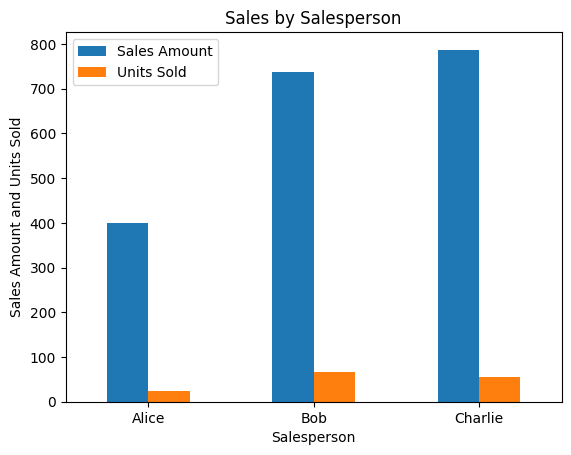

In [ ]:
import matplotlib.pyplot as plt

# Create the bar chart
sales_summary_salesperson.plot(kind='bar')

# Customize the chart
plt.title('Sales by Salesperson')
plt.xlabel('Salesperson')
plt.ylabel('Sales Amount and Units Sold')
plt.legend(['Sales Amount', 'Units Sold'])
#rotate the name
plt.xticks(rotation=0)

plt.show()

- Use the plot method to create a bar chart showing the total sales amount for each product in the sales_data DataFrame.

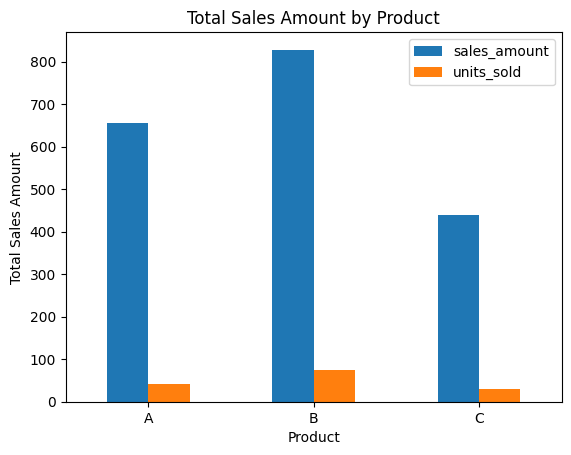

In [ ]:
# Create the bar chart
sales_summary_product.plot(kind='bar')

# Customize the chart
plt.title('Total Sales Amount by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales Amount')
#rotate the name
plt.xticks(rotation=0)

plt.show()

- Use the plot method to create a bar chart showing the total sales amount for each state in the customer_data DataFrame.

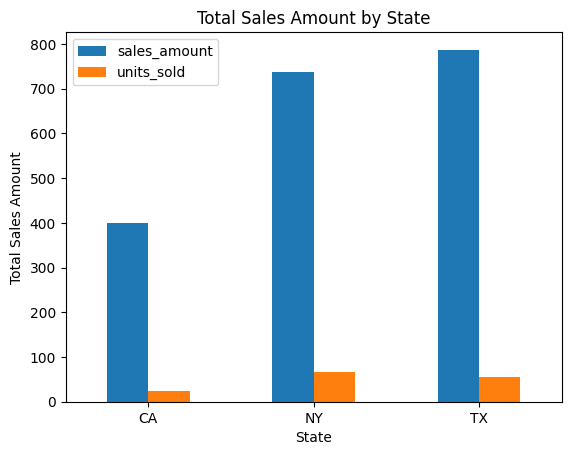

In [ ]:
# Create the bar chart
sales_by_state.plot(kind='bar')

# Customize the chart
plt.title('Total Sales Amount by State')
plt.xlabel('State')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

plt.show()